## Домашнее задание
### 1. Нелинейная регрессия

Дан набор точек. Реализуйте какой-нибудь алгоритм нелинейной регрессии для моделей из семейства функций:

$$
\check{y}=w_1 \cdot x^{w_2}+w_3 \cdot x^{w_4}
$$

Нормируйте данные, найдите наилучшие коэффициенты, удостоверьтесь, что нет переобучения.

In [7]:
x=[0.1,0.10808081,0.11616162,0.12424242,0.13232323,0.14040404,
   0.14848485,0.15656566,0.16464646,0.17272727,0.18080808,
   0.18888889,0.1969697,0.20505051,0.21313131,0.22121212,
   0.22929293,0.23737374,0.24545455,0.25353535,0.26161616,
   0.26969697,0.27777778,0.28585859,0.29393939,0.3020202, 0.31010101,0.31818182,0.32626263,0.33434343,0.34242424,
   0.35050505,0.35858586,0.36666667,0.37474747,0.38282828,
   0.39090909,0.3989899,0.40707071,0.41515152,0.42323232,
   0.43131313,0.43939394,0.44747475,0.45555556,0.46363636,
   0.47171717,0.47979798,0.48787879,0.4959596,0.5040404,
   0.51212121,0.52020202,0.52828283,0.53636364,0.54444444,
   0.55252525,0.56060606,0.56868687,0.57676768,0.58484848,
   0.59292929,0.6010101,0.60909091,0.61717172,0.62525253,
   0.63333333,0.64141414,0.64949495,0.65757576,0.66565657,
   0.67373737,0.68181818,0.68989899,0.6979798,0.70606061,
   0.71414141,0.72222222,0.73030303,0.73838384,0.74646465,
   0.75454545,0.76262626,0.77070707,0.77878788,0.78686869,
   0.79494949,0.8030303,0.81111111,0.81919192,0.82727273,
   0.83535354,0.84343434,0.85151515,0.85959596,0.86767677,
   0.87575758,0.88383838,0.89191919,0.9]

y = [-2.24812911, -2.30215341, -2.34463875, -2.38651064,
     -2.43190693, -2.44713884, -2.49003176, -2.51006098, 
     -2.55831541, -2.57056931, -2.59340317, -2.64026441, 
     -2.65975636, -2.69517476, -2.71046599, -2.74422696, 
     -2.76251291, -2.79505506, -2.79301352, -2.82852207, 
     -2.854651, -2.88654236, -2.92345136, -2.91943321, 
     -2.94240833, -2.9487781, -2.97926813, -2.99198343, 
     -3.03396292, -3.03814694, -3.04944858, -3.07196161, 
     -3.09883706, -3.11338258, -3.11898122, -3.14254571, 
     -3.18330957, -3.17453301, -3.20021237, -3.21213539, 
     -3.23715191, -3.24017664, -3.23640684, -3.26147762, 
     -3.28208909, -3.29453546, -3.31160478, -3.33188752, 
     -3.33320305, -3.35238927, -3.34176317, -3.37471911, 
     -3.37543159, -3.40452694, -3.40505804, -3.43358858, 
     -3.43596139, -3.43705603, -3.45264647, -3.46029402, 
     -3.45723979, -3.4720453, -3.47597438, -3.4795529, 
     -3.50118552, -3.5031452, -3.5097196, -3.51083668, 
     -3.51128397, -3.52708836, -3.5222885, -3.53317295, 
     -3.50965143, -3.51939652, -3.51659198, -3.50734187, 
     -3.50882329, -3.48129755, -3.49384658, -3.48813707, 
     -3.48345018, -3.46180698, -3.44784696, -3.42372263, 
     -3.39080674, -3.37867045, -3.35281766, -3.32575498, 
     -3.28934964, -3.26814804, -3.23547615, -3.1707224, 
     -3.12910072, -3.09300443, -3.02523152, -2.9453774, 
     -2.89454317, -2.83662685, -2.75433056, -2.68946573]

In [259]:
import numpy as np
x = np.array(x)
y = np.array(y)

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

def method(name, formula):
    def decorator(function):
        function.name = name
        function.formula = formula
        return function
    return decorator

@method('Hestenes-Stiefel', r'$\beta_k^{H S}=\frac{\left\langle r_{k}, r_k - r_{k-1}\right\rangle}{\left\langle S_k, r_k - r_{k-1}\right\rangle}$')
def hestenes_stiefel(r, rk, s):
    return np.dot(rk, rk - r) / np.dot(s, rk - r)

@method('Fletcher-Reeves', r'$\beta_k^{F R}=\frac{\left|r_{k}\right|^2}{\left|r_{k-1}\right|^2}$')
def fletcher_reeves(r, rk, s):
    return np.dot(rk, rk) / np.dot(r, r)

@method('Polak-Ribiere', r'$\beta_k^{P R}=\frac{\left\langle r_{k}, r_k - r_{k-1}\right\rangle}{\left|r_{k-1}\right|^2}$')
def polak_ribiere(r, rk, s):
    return np.dot(rk, rk - r) / np.dot(r, r)

@method('Fletcher', r'$\beta_k^{C D}=\frac{\left|r_{k}\right|^2}{\left\langle-S_k, r_{k-1}\right\rangle}$')
def fletcher(r, rk, s):
    return np.dot(rk, rk) / np.dot(-s, r)

@method('Liu-Storey', r'$\beta_k^{L S}=\frac{\left\langle r_k, r_k-r_{k-1}\right\rangle}{\left\langle-S_k, r_{k-1}\right\rangle}$')
def lui_storey(r, rk, s):
    return np.dot(rk, rk - r) / np.dot(-s, r)

@method('Dias-Juan', r'$\beta_k^{D Y}=\frac{\left\|r_k\right\|^2}{\left\langle S_k, r_k-r_{k-1}\right\rangle}$')
def dias_juan(r, rk, s):
    return np.dot(rk, rk) / np.dot(s, rk - r)

@method('Hager-Zhang', r'$\beta_k^{H Z}=\left\langle r_k-r_{k-1}-2 S_k \frac{\left\|r_k-r_{k-1}\right\|^2}{\left\langle S_k, r_k-r_{k-1}\right\rangle}, \frac{r_k}{\left\langle S_k, r_k-r_{k-1}\right\rangle}\right\rangle$')
def hager_zhang(r, rk, s):
    d = rk - r
    sd = np.dot(s, d)
    return np.dot(d - 2 * s * np.dot(d, d) / sd, rk / sd)

@method('fastest descend', r'$0$')
def fastest_descend(r, rk, s):
    return 0

methods = (
    hestenes_stiefel,
    fletcher_reeves,
    polak_ribiere,
    fletcher,
    lui_storey,
    dias_juan,
    hager_zhang,
    fastest_descend,
)

In [45]:
def conjugate(f, grad_f, x, e = 0.01, n = 100, method = fletcher_reeves, steps = None):
    r = -grad_f(x)
    s = r
    last = False
    for _ in range(n):
        result = minimize_scalar(lambda t: f(x + t * s))
        if not result.success:
            print(result.message)
            break
        delta = result.x * s
        x += delta
        if steps is not None:
            if isinstance(steps, int):
                steps += 1
            else:
                steps.append(x)
        if np.linalg.norm(delta) < e:
            if last:
                break
            else:
                last = True
                s = r = -grad_f(x)
                continue
        last = False
        rk = -grad_f(x)
        b = method(r, rk, s)
        r = rk
        s = r + b * s
    if steps is not None:
        return x, steps
    return x

[ 2.95266674  8.42902069 -4.00172623  0.25034286]


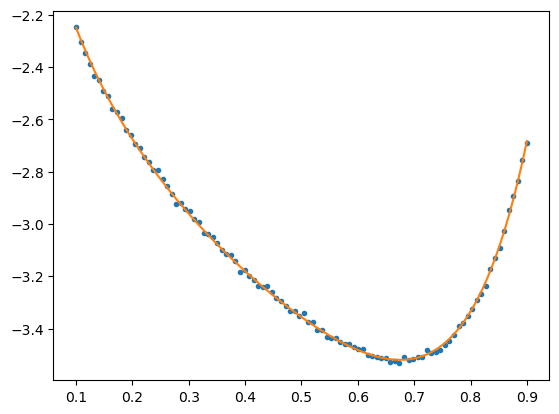

In [8]:
import matplotlib.pyplot as plt

def f(w, x):
    return w[0] * x ** w[1] + w[2] * x ** w[3]

def mse(w):
    return np.square(f(w, x) - y).mean()

def grad_mse(w):
    d = (f(w, x) - y)
    return 2 * np.array([
        d * x ** w[1],
        d * w[0] * np.log(x) * x ** w[1],
        d * x ** w[3],
        d * w[2] * np.log(x) * x ** w[3],
    ]).mean(axis=1)

w = np.array([1, 4, -1, 1], dtype=float)
w = conjugate(mse, grad_mse, w, e=1e-4)
print(w)
# steps = conjugate(mnk, grad_mnk, w, steps=True)
if isinstance(w, str):
    print(w)
else:
    plt.plot(x, y, '.')
    plt.plot(x, f(w, x))

# plt.plot(steps.T[0], steps.T[1], '.')

### 2. Американские горки

Реализуя ручками методы дихотомии и Фиббоначи (золотого сечения), найти точку локального минимума функций (любых двух из _а-ж_ на ваш выбор):

a) $f(x)=2 x^2-\ln x$

б) $f(t)=t^3 / 3+t^2$

в) $f(t)=t^4 / 4-2 t^2$

г) $f(t)=t e^{-t^2 / 2}$

д) $f(t)=3 t^4-8 t^3+6 t^2$

e) $f(t)=(t-5) e^t$

ж) $f(t)=\left(t^2-3\right) /(t+2)$.

In [147]:
def dichotomy(f, a = 0, b = 1, e = 0.01, n = 100, steps = None):
    if steps is not None and steps:
        steps = []
    for _ in range(n):
        c = (a + b) / 2
        fl = f(c - e)
        fr = f(c + e)
        if fl < fr:
            b = c
        else:
            a = c
        if steps is not None:
            steps.append(c)
        if b - a < e:
            break
    if steps is not None:
        return steps
    return (a + b) / 2

In [148]:
import numpy as np
from functools import cache
sqrtFive = np.sqrt(5) 
alpha = (1 + sqrtFive) / 2
beta = (1 - sqrtFive) / 2

@cache
def F(n):
    return np.rint((alpha ** n - beta ** n) / sqrtFive) 

def fibonacci(f, a = 0, b = 1, e = 0.01, n = 100, steps = None):
    if steps is not None and steps:
        steps = []
    x1 = a + (b - a) * F(n - 2) / F(n)
    x2 = a + (b - a) * F(n - 1) / F(n)
    f1 = f(x1)
    f2 = f(x2)
    for i in range(n, 1, -1):
        if steps is not None:
            steps.append((x1 + x2) / 2)
        if f1 > f2:
            a, x1, x2, f1, f2 = x1, x2, b - (x1 - a), f2, f(x2)
        else:
            b, x2, x1, f2, f1 = x2, x1, a + (b - x2), f1, f(x1)
        if b - a < e:
            break
    if steps is not None:
        return steps
    return (x1 + x2) / 2

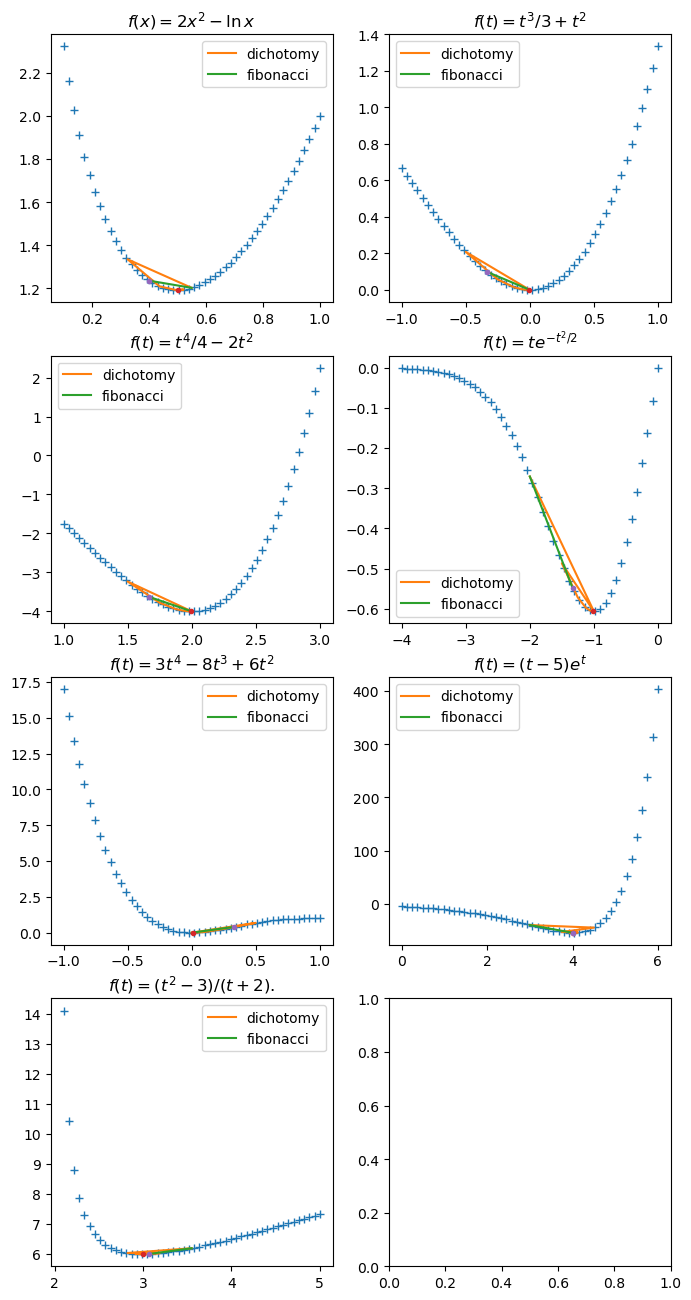

In [85]:
import numpy as np
import matplotlib.pyplot as plt

fff = {
    r'$f(x)=2 x^2-\ln x$': (lambda x: 2 * x * x - np.log(x), 0.1, 1),
    r'$f(t)=t^3 / 3+t^2$': (lambda x: x ** 3 / 3 + x * x, -1, 1),
    r'$f(t)=t^4 / 4-2 t^2$': (lambda x: x ** 4 / 4 - 2 * x * x, 1, 3),
    r'$f(t)=t e^{-t^2 / 2}$': (lambda x: x * np.exp(-x * x / 2), -4, 0),
    r'$f(t)=3 t^4-8 t^3+6 t^2$': (lambda x: 3 * x ** 4 - 8 * x ** 3 + 6 * x * x, -1, 1),
    r'$f(t)=(t-5) e^t$': (lambda x: (x - 5) * np.exp(x), 0, 6),
    r'$f(t)=\left(t^2-3\right) /(t+2)$.': (lambda x: (x * x - 3) / (x - 2), 2.1, 5)
}

w = 2
fig, axs = plt.subplots((len(fff) + w - 1) // w, w, figsize=(8, 16))
for i, (name, (f, a, b)) in enumerate(fff.items()):
    x = np.linspace(a, b)
    ax = axs[i // w][i % w]
    ax.plot(x, f(x), '+')
    ax.set_title(name)
    dic = dichotomy(f, a, b, steps=True)
    fib = fibonacci(f, a, b, steps=True, n = 4)
    ax.plot(dic, list(f(s) for s in dic), label='dichotomy')
    ax.plot(fib, list(f(s) for s in fib), label='fibonacci')
    ax.plot(dic[-1], f(dic[-1]), '.')
    ax.plot(fib[-1], f(fib[-1]), '.')
    ax.legend()

### 3. Функция Растригина.

$$
f\left(x_1, x_2\right)=20+x_1^2+x_2^2-10 \cos \left(2 \pi x_1\right)-10 \cos \left(2 \pi x_2\right)
$$

Постройте множество локальных минимумов и максимумов на плоскости используя `minimize`. Минимумы должны быть синими, максимумы - красными. В 3D график функции выглядит примерно так:

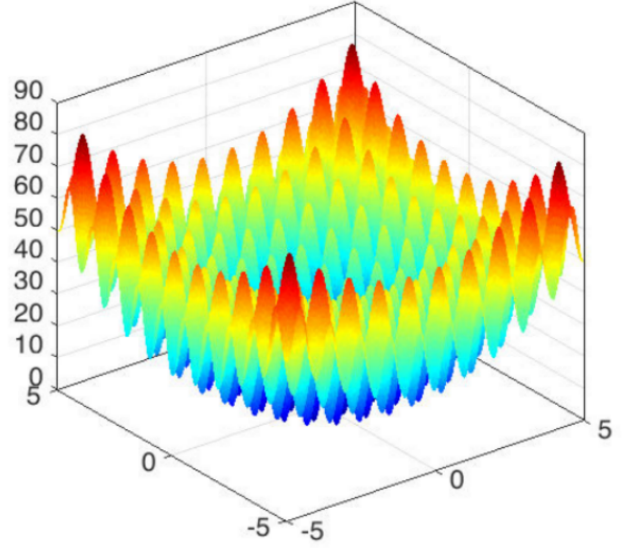

In [127]:
import numpy as np

def f(x, y):
    fx = x * x - 10 * np.cos(2 * np.pi * x)
    fy = y * y - 10 * np.cos(2 * np.pi * y)
    if hasattr(x, '__len__') and hasattr(y, '__len__'):
        ox = np.ones(len(x)).reshape((len(x), 1))
        oy = np.ones(len(y)).reshape((1, len(y)))
        fx = fx.reshape((len(x), 1))
        fy = fy.reshape((1, len(y)))
        return 20 + fx @ oy + ox @ fy
    else:
        return 20 + fx + fy

In [142]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

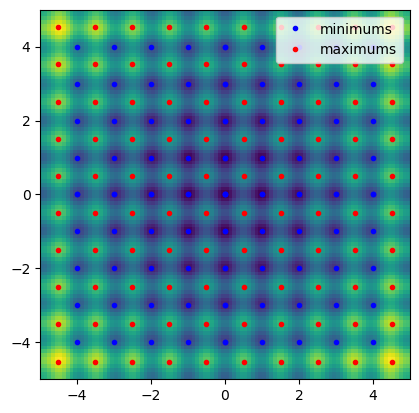

In [144]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
plt.imshow(f(x, y), extent=(-5, 5, -5, 5))

e = 1
x0s = np.linspace(-5, 4, 10)
mins = []
maxs = []
for x0 in x0s:
    for y0 in x0s:
        xm, ym = minimize(lambda x: f(x[0], x[1]), (x0 + e / 2, y0 + e / 2), bounds=((x0, x0 + e), (y0, y0 + e))).x
        xM, yM = minimize(lambda x: -f(x[0], x[1]), (x0 + e / 2, y0 + e / 2), bounds=((x0, x0 + e), (y0, y0 + e))).x
        mins.append((xm, ym))
        maxs.append((xM, yM))
mins = np.array(mins)
maxs = np.array(maxs)
plt.plot(*mins.T, '.', color='blue', label='minimums')
plt.plot(*maxs.T, '.', color='red', label='maximums')
plt.legend()

### 4. Градиенты градиентами

На этих рисунках изображены траектории движения в точку минимума методами сопряжённых градиентов и наискорейшего спуска:

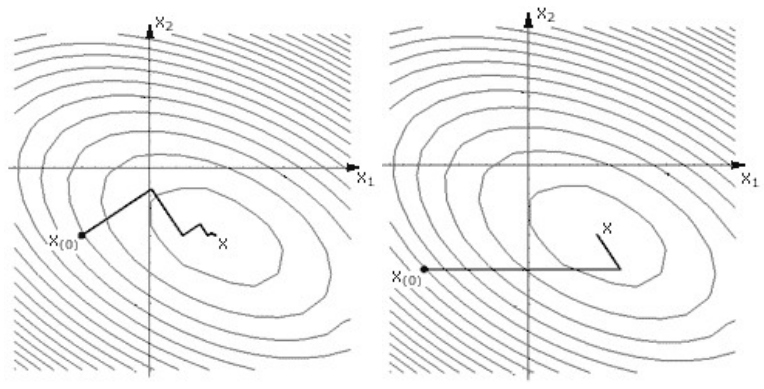

Определите, на каком из них какой из этих двух методов проиллюстрирован.  Ответ аргументируйте. Что изображают замкнутые линии? Докажите(*), что один из этих двух методов (какой?) позволяет решать квадратичные задачи за конечное число шагов. Каково максимально возможное количество этих шагов для матрицы размера n?


На левом рисунке изображён метод наискорейшего спуска, так как на каждой итерации он идёт в перпендикулярном направлении от предыдущего, а метод сопряжённых градиентов идёт по ортогональности градиентов положительно определённой квадратичной формы, то есть необязательно перпендикулярно.

### 5. Овальный

Градиентный метод сходится достаточно быстро, если для минимизируемой функции f (x) поверхности уровня близки к сферам (при n = 2 – к окружностям). Если же линии уровня сильно вытянуты в каком-то направлении, то по нормали к этому направлению целевая функция меняется значительно быстрее, чем вдоль направления. Такой характер целевой функции называется овражным. Исходя из рисунка, объясните, почему в этих случаях градиентный метод сходится хуже.

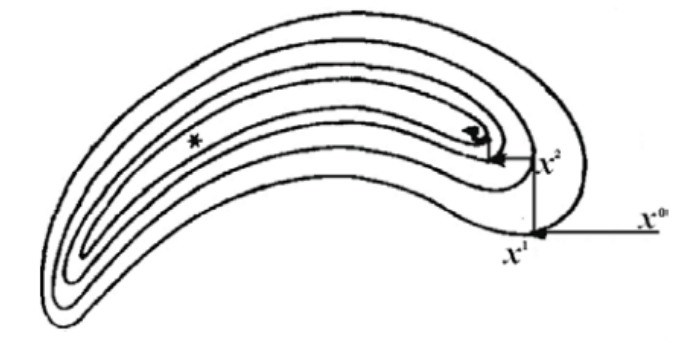

Как связан овражный характер функции с величиной наименьшего сингулярного числа матрицы квадратичной формы? А с величиной числа обусловленности матрицы?

На рисунке ниже изображена работа метода покоординатного спуска (поочередно минимизируем функцию вдоль каждой координаты однопараметрическим методом - совсем убого, поэтому не выдавали) для функций овражного характера. Какой вывод можно сделать из этого рисунка?

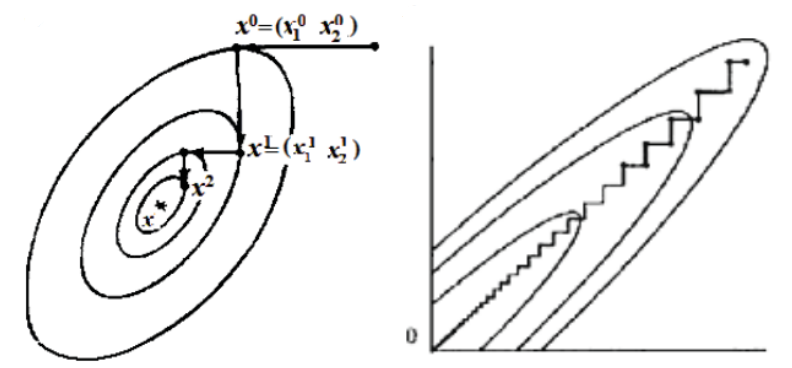 

### 6. Сопрягаемся (полузвёздочка)

Рассмотрим на примере функции Стайблински-Танга поведение различных вариантов метода сопряженных градиентов. Функция задается выражением
$$
f(x)=\frac{1}{2} \sum_{i=1}^n x_i^4-16 x_i^2+5 x_i .
$$
Глобальным минимум достигается в точке $(\eta, \ldots, \eta)$, где $\eta \approx-2.904$. Использовать данную функцию будем при $n=2$, чтобы наглядно проиллюстрировать результаты.

Напишите все 7 вариантов __(*, если не на доп. быллы, то возьмите 2 из алгоритма)__ реализации метода сопряженных градиентов из семинара. Сравните результаты. Функция специально подобрана таким образом, что некоторые из вариантов реализации ответ не смогут получить, а остальные продемонстрируют разное качество работы.

Качество измерьте как количество итераций, необходимое для получения точности

$$
\left\|r\right\|<10^{-6}
$$

Пусть метод останавливается на итерации $k$, если выполняется условие $\left\|r_k\right\|<10^{-6}$, или по истечению 1000 итераций.

Начальные приближения берите следующие: 

(0.1, -1)

(0.1, -1.1)

(0, -1)

In [61]:
def styblinski_tang(x):
    x2 = x * x
    return (x2 * x2 - 16 * x2 + 5 * x).sum() / 2

def grad_styblinski_tang(x):
    return 2 * x * x * x - 16 * x + 2.5

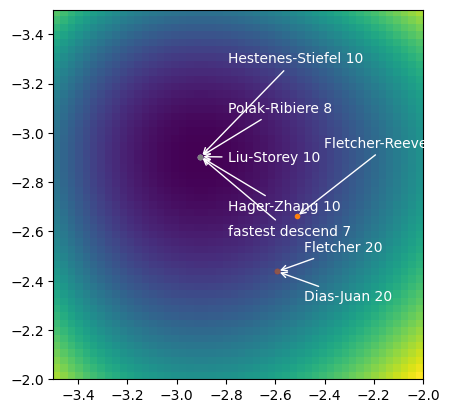

In [264]:
import numpy as np

e = 1e-6
n = 20
ww = np.array((
    (0.1, -1),
    (0.1, -1.1),
    (0, -1),
    (1, 0),
),)

x0 = np.linspace(-3.5, -2)
extent = (x0.min(), x0.max(), x0.max(), x0.min())
plt.imshow([[styblinski_tang(np.array([x, y])) for x in x0] for y in x0], extent=extent)

for i, w0 in enumerate(ww[2:3]):
    for j, m in enumerate(methods):
        w, steps = conjugate(styblinski_tang, grad_styblinski_tang, np.array(w0), e=e, n=n, method=m, steps=[])
        line, *_ = plt.plot(*w, '.')
        d = (0.1, 0.1 * (j - len(methods) / 2))
        plt.annotate(
            f'{m.name} {len(steps)}',
            xy=w,
            xytext = w + d + (0.01, 0.02),
            color='white',
            arrowprops=dict(arrowstyle='->', color='white'),
        )
        s0 = steps[0]
        for s in steps:
            plt.annotate(
                '',
                xy=s,
                xytext=s0,
                color='red',
                arrowprops=dict(arrowstyle='->', color=line.get_color())
            )
            s0 = s

### 7.* Сопрягаемся на максималках

Покажите экспериментально, что метод сопряженных градиентов работает во много раз лучше на случайных положительно определенных квадратичных формах. Можно использовать встроенные минимизаторы.

In [72]:
import numpy as np
from scipy.optimize import minimize

n = 100
e = 1e-5

x0 = np.ones(n)
k1s = []
k2s = []
xs = []
for i in range(1000):
    U, S, *_ = np.linalg.svd(np.random.normal(scale=n, size=(n, n)))
    A = U @ np.diag(S) @ U.T

    def f(x):
        return x.T @ A @ x

    def grad_f(x):
        return U.T @ (2 * S * (U @ x))

    x1, k1 = conjugate(f, grad_f, x0, n=n, e=e, method=fastest_descend, steps=0)
    x2, k2 = conjugate(f, grad_f, x0, n=n, e=e, method=fletcher_reeves, steps=0)
    if np.linalg.norm(x1 - x2) < e: # found the same minimum
        k1s.append(k1)
        k2s.append(k2)
        xs.append(x1)
xs = np.array(xs)

array([[ 9.53731701e-166, -1.88684150e-166,  3.61566146e-165, ...,
         2.51649591e-165, -3.10544075e-165, -6.23139035e-165],
       [ 9.53731701e-166, -1.88684150e-166,  3.61566146e-165, ...,
         2.51649591e-165, -3.10544075e-165, -6.23139035e-165],
       [ 9.53731701e-166, -1.88684150e-166,  3.61566146e-165, ...,
         2.51649591e-165, -3.10544075e-165, -6.23139035e-165],
       ...,
       [ 9.53731701e-166, -1.88684150e-166,  3.61566146e-165, ...,
         2.51649591e-165, -3.10544075e-165, -6.23139035e-165],
       [ 9.53731701e-166, -1.88684150e-166,  3.61566146e-165, ...,
         2.51649591e-165, -3.10544075e-165, -6.23139035e-165],
       [ 9.53731701e-166, -1.88684150e-166,  3.61566146e-165, ...,
         2.51649591e-165, -3.10544075e-165, -6.23139035e-165]])

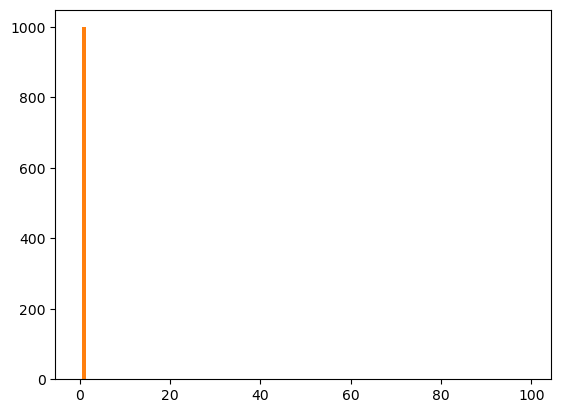

In [73]:
import matplotlib.pyplot as plt
k1h = np.histogram(k1s, bins=n, range=(1, n))[0]
k2h = np.histogram(k2s, bins=n, range=(1, n))[0]
xxx = np.arange(0, n)
plt.bar(xxx, k1h)
plt.bar(xxx, k2h)
xs
# plt.plot(xs.T[0], xs.T[1], '.')